In [3]:
!unzip '/content/dataset'

unzip:  cannot find or open /content/dataset, /content/dataset.zip or /content/dataset.ZIP.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/datasets/dataset.zip" -d '/content/drive/MyDrive/datasets/dataset'

Archive:  /content/drive/MyDrive/datasets/dataset.zip
replace /content/drive/MyDrive/datasets/dataset/test/angry/PrivateTest_10131363.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: new_dataset
  inflating: /content/drive/MyDrive/datasets/dataset/new_dataset  
replace /content/drive/MyDrive/datasets/dataset/test/angry/PrivateTest_10304478.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: b
error:  invalid response [b]
replace /content/drive/MyDrive/datasets/dataset/test/angry/PrivateTest_10304478.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/datasets/dataset/test/angry/PrivateTest_1054527.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/datasets/dataset/test/angry/PrivateTest_10590091.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Importing necessary libraries

In [5]:
import tensorflow as tf 
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

## Data Pre Processing

In [8]:
img_arr=cv2.imread("/content/drive/MyDrive/datasets/dataset/train/confused/Training_10013223.jpg")
img_arr.shape

(48, 48, 3)

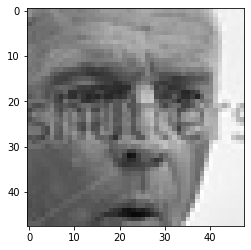

In [9]:
plt.imshow(img_arr)

In [12]:
Datadirectory="/content/drive/MyDrive/datasets/dataset/train"
Classes=["frustrated","engaged","bored","confused"]

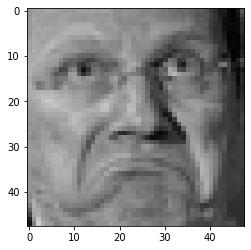

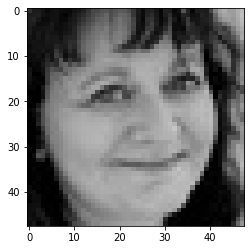

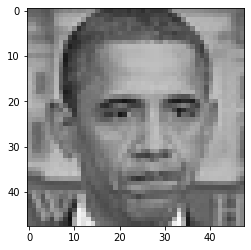

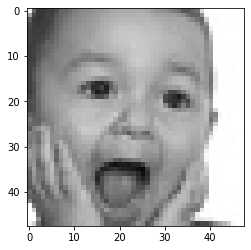

In [13]:
for category in Classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_arr=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB))
        plt.show()
        break

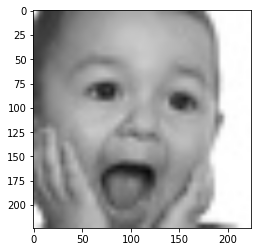

In [14]:
img_size=224
new_arr=cv2.resize(img_arr, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_arr, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
new_arr.shape

(224, 224, 3)

# read images and convert images to array

In [16]:
training_data=[]
def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                new_arr=cv2.resize(img_arr, (img_size, img_size))
                training_data.append([new_arr, class_num])
            except Exception as e:
                pass    

In [17]:
create_training_data()
print(len(training_data))

In [ ]:
temp = np.array(training_data)
temp.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(4796, 2)

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
import random
random.shuffle(training_data)
x = []
y = []
for features,label in training_data:
    x.append(features)
    y.append(label)  
x = np.array(x).reshape(-1,img_size, img_size, 3)

In [ ]:
x=x/255.0
print(x)

[[[[0.65490196 0.65490196 0.65490196]
   [0.65490196 0.65490196 0.65490196]
   [0.65490196 0.65490196 0.65490196]
   ...
   [0.21176471 0.21176471 0.21176471]
   [0.21176471 0.21176471 0.21176471]
   [0.21176471 0.21176471 0.21176471]]

  [[0.65490196 0.65490196 0.65490196]
   [0.65490196 0.65490196 0.65490196]
   [0.65490196 0.65490196 0.65490196]
   ...
   [0.21176471 0.21176471 0.21176471]
   [0.21176471 0.21176471 0.21176471]
   [0.21176471 0.21176471 0.21176471]]

  [[0.65490196 0.65490196 0.65490196]
   [0.65490196 0.65490196 0.65490196]
   [0.65490196 0.65490196 0.65490196]
   ...
   [0.21176471 0.21176471 0.21176471]
   [0.21176471 0.21176471 0.21176471]
   [0.21176471 0.21176471 0.21176471]]

  ...

  [[0.21960784 0.21960784 0.21960784]
   [0.21960784 0.21960784 0.21960784]
   [0.21960784 0.21960784 0.21960784]
   ...
   [0.37647059 0.37647059 0.37647059]
   [0.37647059 0.37647059 0.37647059]
   [0.37647059 0.37647059 0.37647059]]

  [[0.21960784 0.21960784 0.21960784]
   [0.2

In [ ]:
y=np.array(y)
y.shape

(4796,)

### deep learning model for training - Transfer **Learning**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model =tf.keras.applications.MobileNetV2()

14540800/14536120 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

## Transfer learning

In [ ]:
base_input = model.layers[0].input
base_output = model.layers[-2].output
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
final_output = layers.Dense(128)(base_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_ouput)

In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [ ]:
new_model = keras.Model(inputs= base_input, outputs = final_output)

NameError: ignored

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
new_model.compile(loss = "sparse_categorical_crossentropy" , optimizer = "adam", metrics = ["accuracy"])
new_model.fit(x,y, epochs = 5)
new_model.save('emotion_recognition_mobilenetv2.h5')

In [ ]:
accuracy = new_model.history['accuracy']
val_accuracy = new_model.history['val_accuracy']
loss = new_model.history['loss']
val_loss = new_model.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	plt.savefig(filename + '_plot.png')
	plt.close()
summarize_diagnostics(new_model)

In [ ]:
 model=tf.keras.models.load_model('emotion_recognition_mobilenetv2.h5')
 

In [ ]:
model.evaluate

<bound method Model.evaluate of <tensorflow.python.keras.engine.functional.Functional object at 0x7f76d1800d90>>